In [1]:
import numpy as np
import pandas as pd
# from xgboost import XGBRegressor
# import shap
import seaborn as sns
import sys
sys.path.insert(0, '../data_prep')
from sqlite_utils import table_to_df

In [2]:
pred_df = table_to_df(table_name='FILM_ALGO_SCORE')
pred_df['EITHER_SCORE'] = (pred_df['FILM_RATING_SCALED'].fillna(0) / 5) + (pred_df['ALGO_SCORE'].fillna(0))
pred_df['RATED'] = np.where(pred_df['FILM_RATING_SCALED'].isnull(), 0, 1)
pred_df.sort_values('ALGO_SCORE', ascending=False)

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,JACK ANGEL,ALAN TUDYK,THOMAS ROSALES JR.,BOB BERGEN,MICKIE MCGOWAN,SHERRY LYNN,FILM_RATING_SCALED,ALGO_SCORE,EITHER_SCORE,RATED
40,f_02aVE,A Clockwork Orange,1262706,0.0,4.13,0.326823,0.021754,137,1971,2.823862,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000,1.000000,0
50,f_02bcA,Blade Runner,1275927,0.0,4.10,0.346155,0.028754,118,1982,4.155167,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.992582,0.992582,0
970,f_02aQY,The Terminator,899690,0.0,3.89,0.239217,0.002809,108,1984,4.243315,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.989217,0.989217,0
117,f_0b8wK,Blade Runner 2049,1593560,0.0,4.13,0.378853,0.025117,164,2017,4.393880,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.988413,0.988413,0
678,f_0293w,The Prestige,1264536,0.0,4.22,0.327649,0.016022,130,2006,4.107824,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.984135,0.984135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,f_01woA,Night of the Demon,18714,0.0,3.80,0.288394,0.002832,96,1957,2.614501,...,0.0,0.0,0.0,0.0,0.0,0.0,1.820000,NaN,0.364000,1
15449,f_0jc18,The Furies,8051,0.0,2.72,0.153646,0.000124,82,2019,2.823862,...,0.0,0.0,0.0,0.0,0.0,0.0,2.383333,NaN,0.476667,1
15450,f_0q0Dy,I Wanna Dance with Somebody,43264,0.0,2.95,0.175227,0.000485,144,2022,2.823862,...,0.0,0.0,0.0,0.0,0.0,0.0,2.311905,NaN,0.462381,1
15451,f_0vHpu,Sisu,1282,0.0,3.46,0.244930,0.001560,91,2022,2.823862,...,0.0,0.0,0.0,0.0,0.0,0.0,2.818376,NaN,0.563675,1


In [3]:
shap_df = table_to_df(table_name='FILM_SHAP_VALUES')
shap_df

,FILM_ID,BASE_VALUE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FILM_YEAR,DIRECTOR_MEAN_RATING,DIRECTOR_TOTAL_FILMS,DIRECTOR_PERCENT_WATCHED,...,BRAD PITT,MATT DAMON,SAMUEL L. JACKSON,NICOLAS CAGE,WILLEM DAFOE,VIN DIESEL,FRANK WELKER,JACK ANGEL,THOMAS ROSALES JR.,PREDICTION
0,f_0t4EQ,0.672846,-0.008519,0.0,-0.029725,-0.031672,0.045234,-0.024557,-0.004896,-0.004734,...,-0.000113,0.0,0.017515,0.000281,-0.000114,0.000050,0.0,0.0,0.0,0.570724
1,f_02aNK,0.675568,0.064062,0.0,0.168224,0.019739,-0.010516,-0.002545,-0.011274,-0.006908,...,-0.000057,0.0,0.000000,0.000213,-0.000202,0.000124,0.0,0.0,0.0,0.850279
2,f_02aNq,0.675678,0.042358,0.0,0.173641,0.021860,-0.007498,-0.005256,0.011362,-0.009208,...,-0.000057,0.0,0.000000,0.000273,-0.000194,0.000124,0.0,0.0,0.0,0.867460
3,f_02axi,0.676191,0.059174,0.0,0.167610,0.031827,-0.007344,-0.006101,0.020439,0.012781,...,-0.000057,0.0,0.000000,0.000275,-0.000067,0.000100,0.0,0.0,0.0,0.957103
4,f_02b0k,0.675796,0.081160,0.0,0.143800,-0.001684,0.008281,0.023640,-0.003649,0.002487,...,-0.000113,0.0,0.000000,0.000252,-0.000099,0.000062,0.0,0.0,0.0,0.886553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14404,f_047rA,0.671002,-0.085417,0.0,0.001958,0.064243,-0.023701,-0.031210,-0.040404,-0.090164,...,-0.000056,0.0,0.000000,0.000400,-0.000146,0.000100,0.0,0.0,0.0,0.466175
14405,f_0b5Ew,0.667076,-0.117142,0.0,-0.126693,-0.011310,0.003286,-0.018195,-0.005171,0.003859,...,-0.000056,0.0,0.000000,0.000126,-0.000159,0.000194,0.0,0.0,0.0,0.334562
14406,f_0H2TW,0.672340,-0.050457,0.0,-0.015720,0.019293,0.011857,-0.016456,0.005939,-0.017028,...,-0.000056,0.0,0.000000,0.000146,-0.000143,-0.000020,0.0,0.0,0.0,0.537693
14407,f_01j3k,0.667440,-0.129853,0.0,-0.074453,-0.031861,-0.000548,-0.030286,-0.030244,-0.029354,...,-0.000056,0.0,0.000000,0.000267,-0.000135,0.000216,0.0,0.0,0.0,0.343612


In [4]:
def get_valid_cols(film_id, min_shap_val=0.001):
    filmid_shap_df = shap_df[shap_df['FILM_ID']==film_id].reset_index(drop=True)
    valid_cols = []
    for col in filmid_shap_df.columns:
        shap_val = filmid_shap_df[col][0]
        if isinstance(shap_val, str):
            col_valid = False
        elif np.isnan(shap_val):
            col_valid = False
        elif abs(shap_val) < min_shap_val:
            col_valid = False
        elif col == 'BASE_VALUE':
            col_valid = True
        else:
            col_valid = True
        if col_valid:
            valid_cols.append(col)
    return valid_cols

In [5]:
def create_dual_df(film_id, valid_cols):
    film_title = pred_df[pred_df['FILM_ID']==film_id]['FILM_TITLE'].values[0]
    dual_df = pd.concat([pred_df[pred_df['FILM_ID']==film_id], shap_df[shap_df['FILM_ID']==film_id]])
    dual_df['FILM_TITLE'] = dual_df['FILM_TITLE'].fillna(film_title)
    dual_df['ALGO_SCORE'] = dual_df['ALGO_SCORE'].fillna(dual_df['ALGO_SCORE'].max())
    dual_df = dual_df[valid_cols]
    dual_df.insert(2, 'INFO', ['FEATURE_VALUE', 'SHAP_VALUE'])
    dual_df = dual_df.reset_index(drop=True)
    return dual_df

In [6]:
def return_comparison_df(film_ids, min_shap_val=0.001, decimal_places=3):
    valid_cols = [get_valid_cols(x, min_shap_val=min_shap_val) for x in film_ids]
    valid_cols = list(set([col for valid_col_list in valid_cols for col in valid_col_list]))
    valid_cols = ['FILM_ID', 'FILM_TITLE', 'ALGO_SCORE'] + valid_cols
    valid_cols = [x for x in pred_df.columns if x in valid_cols]
    valid_cols.append('BASE_VALUE')
    all_dfs = []
    for n, film_id in enumerate(film_ids):
        dual_df = create_dual_df(film_id, valid_cols)
        melted_df = pd.melt(dual_df, id_vars=['FILM_ID', 'FILM_TITLE', 'INFO'])
        pivoted_df = melted_df.drop('FILM_ID', axis=1).pivot(index='variable', columns=['FILM_TITLE', 'INFO'], values='value').reset_index()
        pivoted_df.columns = [' '.join(col) for col in pivoted_df.columns]
        if n > 0:
            pivoted_df = pivoted_df.drop('variable ', axis=1)
        all_dfs.append(pivoted_df)
    comparison_df = pd.concat(all_dfs, axis=1)
    if len(film_ids) > 1:
        comparison_df['VAR'] = comparison_df[comparison_df.columns[2]] - comparison_df[comparison_df.columns[4]]
        comparison_df['ABS_VAR'] = comparison_df['VAR'].abs()
        comparison_df = comparison_df.sort_values('ABS_VAR', ascending=False)
    else:
        comparison_df = comparison_df.sort_values(comparison_df.columns[2], ascending=False)
    return comparison_df.round(decimal_places)

In [7]:
film_id_selections = ['f_02ahY', 'f_01Kk8']

return_comparison_df(film_id_selections)

,variable,Good Will Hunting FEATURE_VALUE,Good Will Hunting SHAP_VALUE,The Texas Chainsaw Massacre 2 FEATURE_VALUE,The Texas Chainsaw Massacre 2 SHAP_VALUE,VAR,ABS_VAR
0,ALGO_SCORE,0.957,0.957,0.550,0.550,0.407,0.407
10,FILM_RATING,4.290,0.140,3.180,-0.060,0.200,0.200
11,FILM_WATCH_COUNT,1628154.000,0.065,104983.000,-0.003,0.069,0.069
2,COMEDY,0.000,0.006,1.000,-0.036,0.042,0.042
17,MATT DAMON,1.000,0.036,0.000,0.000,0.036,0.036
16,LIKES_PER_WATCH,0.354,0.036,0.276,0.001,0.035,0.035
12,FILM_YEAR,1997.000,0.010,1986.000,-0.014,0.024,0.024
14,HORROR,0.000,-0.006,1.000,0.013,-0.019,0.019
5,DIRECTOR_MEAN_RATING,2.824,-0.003,3.038,-0.021,0.018,0.018
4,DECAPITATION,0.000,0.000,1.000,0.011,-0.011,0.011


,FILM_ID,FILM_RATING,ALGO_SCORE,FILM_RATING_SHAP
0,f_0t4EQ,2.70,0.570724,-0.029725
1,f_02aNK,4.56,0.850279,0.168224
2,f_02aNq,4.59,0.867460,0.173641
3,f_02axi,4.60,0.957103,0.167610
4,f_02b0k,4.46,0.886553,0.143800
...,...,...,...,...
14403,f_0Boyu,3.56,0.618291,-0.010454
14404,f_047rA,3.58,0.466175,0.001958
14405,f_0b5Ew,2.01,0.334562,-0.126693
14406,f_0H2TW,3.17,0.537693,-0.015720


c:\Users\tomdevine\Desktop\dev\PersonalProjects\letterboxd-app\letterboxd-env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FILM_RATING', ylabel='FILM_RATING_SHAP'>

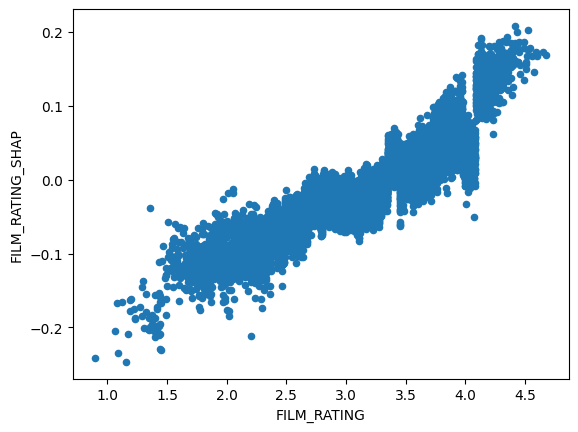

In [8]:
select_a_feature = 'FILM_RATING'
shap_df_feature = shap_df[['FILM_ID', select_a_feature]]
shap_df_feature.columns = ['FILM_ID', select_a_feature+'_SHAP']
pred_df_feature = pred_df[['FILM_ID', select_a_feature, 'ALGO_SCORE']]
feature_df = pred_df_feature.merge(shap_df_feature, how='left', on='FILM_ID')
feature_df = feature_df.dropna()
feature_df = feature_df[feature_df['FILM_RATING'] > 0]
display(feature_df)
feature_df.plot(kind='scatter', x=select_a_feature, y=select_a_feature+'_SHAP')

<Axes: xlabel='FILM_RATING', ylabel='PREDICTION'>

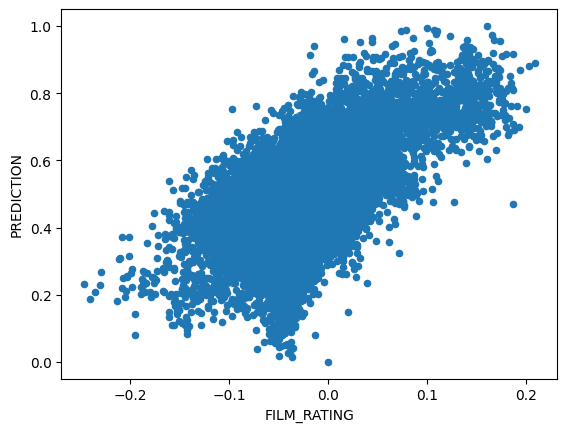

In [9]:
shap_df.plot(kind='scatter', x='FILM_RATING', y='PREDICTION')

<Axes: xlabel='FILM_RATING', ylabel='EITHER_SCORE'>

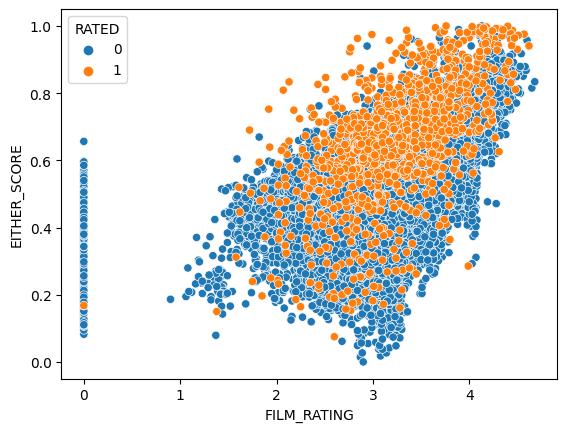

In [10]:
sns.scatterplot(pred_df, x='FILM_RATING', y='EITHER_SCORE', hue='RATED')